# RIDGE REGRESSION

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score , cross_val_predict
from sklearn.metrics import mean_squared_error

## Modelling

In [3]:
#Import Data, get_dummies, tes_train split.
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25 ,random_state = 42)

In [5]:
from sklearn.linear_model import Ridge

In [6]:
ridge_model = Ridge(alpha = 0.1).fit(X_train,y_train)

In [7]:
ridge_model

Ridge(alpha=0.1)

In [8]:
#Coefficients
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

Text(0.5, 1.0, 'Ridge Coef.')

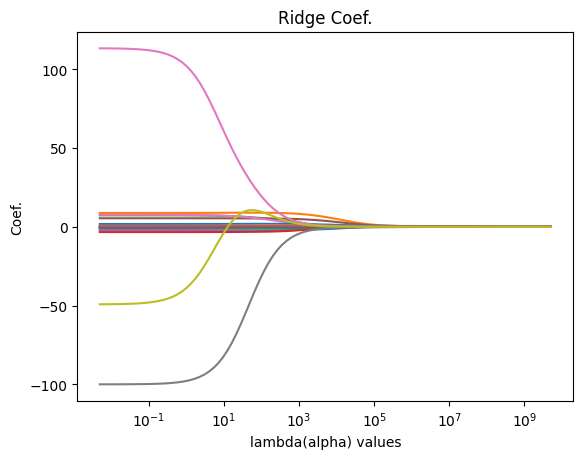

In [41]:
# Relationship between coefficients and lambda/alpha values.
lambda_values = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
coef = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train,y_train)
    coef.append(ridge_model.coef_)

ax = plt.gca()
ax.plot(lambda_values, coef)
ax.set_xscale("log")
plt.xlabel("lambda(alpha) values")
plt.ylabel("Coef.")
plt.title("Ridge Coef.")

## PREDICT

In [15]:
y_pred = ridge_model.predict(X_test)

In [38]:
# RMSE value for test
np.sqrt(mean_squared_error(y_test,y_pred))

357.05179222828355

In [39]:
# R^2 value for test
ridge_model.score(X_test,y_test)

0.4110844905067639

In [40]:
# R^2 value for train
ridge_model.score(X_train,y_train)

0.5770075235888349

## Model Tunning

We get optimum value of lambda/alpha for our model.

In [26]:
lambda_values = 10**np.linspace(10,-2,100)*0.5

In [27]:
lambda_values[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [44]:
# Cross Validation.
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas = lambda_values,
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [45]:
ridge_cv.fit(X_train, y_train)

C:\Users\umutk\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alphas to: original_alphas * n_samples. 
  warnings.warn(


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [46]:
# We obtained the optimum value of A using cross validation
ridge_cv.alpha_

0.7599555414764666

In [47]:
# Optimum Alpha ile final modelimizi kuralım:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_,
                   normalize = True).fit(X_train,y_train)

C:\Users\umutk\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [48]:
# RMSE value for test after we tuned our model.
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

386.6826429756415